
## **MIS710 Machine Learning in Business - Assignment 2**


Student Name: Ankush Nag Mysore Bharath

Student ID: 221034107

## 1. Business understandings, problem, solution and recommendations


In [195]:
# import libraries 
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt


In [196]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [197]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [198]:
# load dataset
records = pd.read_csv("/content/drive/MyDrive/Project Data /VSNeoBank.csv")

#explore the dataset
print(records)

print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1]) 

      CustomerID Sex  Age Marital Status  Number of Dependants  \
0     1621953962   M   51        Married                     2   
1     1599451862   M   46        Married                     3   
2     1429196012   F   49        Married                     1   
3     1417901012   M   54        Married                     3   
4     1427399912   M   47         Single                     2   
...          ...  ..  ...            ...                   ...   
8096  1417736312   M   43        Married                     3   
8097  1429146062   F   49        Married                     3   
8098  1421458712   F   49        Married                     3   
8099  1427072012   M   56        Married                     1   
8100  1437294662   M   35        Married                     4   

       Annual Income Account Type  Credit Limit  Number of Accounts  \
0        $70K - $90K       Silver        4123.0                   5   
1       $90K - $110K       Silver       19458.0                  

In [199]:
# load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.parsers.readers import annotations

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation

#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

## **Loading data**

In [200]:
#explore the dataset
print(records)

      CustomerID Sex  Age Marital Status  Number of Dependants  \
0     1621953962   M   51        Married                     2   
1     1599451862   M   46        Married                     3   
2     1429196012   F   49        Married                     1   
3     1417901012   M   54        Married                     3   
4     1427399912   M   47         Single                     2   
...          ...  ..  ...            ...                   ...   
8096  1417736312   M   43        Married                     3   
8097  1429146062   F   49        Married                     3   
8098  1421458712   F   49        Married                     3   
8099  1427072012   M   56        Married                     1   
8100  1437294662   M   35        Married                     4   

       Annual Income Account Type  Credit Limit  Number of Accounts  \
0        $70K - $90K       Silver        4123.0                   5   
1       $90K - $110K       Silver       19458.0                  

In [201]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         8101 non-null   int64  
 1   Sex                                8101 non-null   object 
 2   Age                                8101 non-null   int64  
 3   Marital Status                     8101 non-null   object 
 4   Number of Dependants               8101 non-null   int64  
 5   Annual Income                      8101 non-null   object 
 6   Account Type                       8101 non-null   object 
 7   Credit Limit                       8101 non-null   float64
 8   Number of Accounts                 8101 non-null   int64  
 9   Months since Openning              8101 non-null   int64  
 10  Outstanding Balance                8101 non-null   int64  
 11  Utilisation Ratio                  8101 non-null   float

In [202]:
#Inspect missing data
records.isnull().sum()

CustomerID                           0
Sex                                  0
Age                                  0
Marital Status                       0
Number of Dependants                 0
Annual Income                        0
Account Type                         0
Credit Limit                         0
Number of Accounts                   0
Months since Openning                0
Outstanding Balance                  0
Utilisation Ratio                    0
Total Amount of Transactions         0
Total Number of Transactions         0
Number of Contacts over 12 months    0
Months Inactive over 12 months       0
Status                               0
dtype: int64

In [203]:
#drop irrelevant variables
records.drop(['CustomerID'], axis = 1)

,Sex,Age,Marital Status,Number of Dependants,Annual Income,Account Type,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,Number of Contacts over 12 months,Months Inactive over 12 months,Status
0,M,51,Married,2,$70K - $90K,Silver,4123.0,5,46,1760,0.427,2447,40,2,3,Closed
1,M,46,Married,3,$90K - $110K,Silver,19458.0,4,40,1435,0.074,1217,27,3,3,Active
2,F,49,Married,1,$50K - $70K,Silver,1438.3,4,41,522,0.363,2030,37,3,3,Closed
3,M,54,Married,3,$90K - $110K,Gold,34516.0,2,36,761,0.022,8444,68,1,3,Closed
4,M,47,Single,2,$90K - $110K,Silver,34516.0,3,36,1264,0.037,7827,77,2,2,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,M,43,Married,3,$90K - $110K,Silver,4196.0,2,32,1331,0.317,14545,116,2,1,Active
8097,F,49,Married,3,Less than $50K,Silver,1438.3,3,36,0,0.000,4553,78,3,2,Active
8098,F,49,Married,3,Less than $50K,Silver,1763.0,4,36,0,0.000,2813,43,2,2,Closed
8099,M,56,Married,1,$110K and Over,Silver,2585.0,6,48,1207,0.467,1590,33,4,3,Active


In [204]:
#convert categorical data to numerical 
def coding_status(x):
        if x=='Closed': return 1
        if x=='Active': return 0
       
records['Status'] = records['Status'].apply(coding_status)

print(records.sample(10))

      CustomerID Sex  Age Marital Status  Number of Dependants  \
1990  1655812412   M   40        Married                     4   
7715  1517107262   M   51        Married                     2   
3201  1624464662   M   47        Married                     2   
2902  1421034662   F   42         Single                     1   
5088  1579550012   M   49        Unknown                     3   
7737  1427650112   F   31        Married                     2   
5611  1430795912   F   44        Unknown                     3   
4457  1432662812   F   46         Single                     3   
4390  1442082662   M   40         Single                     4   
6013  1419721112   M   29       Divorced                     2   

       Annual Income Account Type  Credit Limit  Number of Accounts  \
1990  $110K and Over       Silver       17606.0                   2   
7715     $50K - $70K       Silver        6205.0                   4   
3201     $50K - $70K       Silver        2430.0             

# 2. Data understanding, preparation, explorations and visualisation

In [205]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         8101 non-null   int64  
 1   Sex                                8101 non-null   object 
 2   Age                                8101 non-null   int64  
 3   Marital Status                     8101 non-null   object 
 4   Number of Dependants               8101 non-null   int64  
 5   Annual Income                      8101 non-null   object 
 6   Account Type                       8101 non-null   object 
 7   Credit Limit                       8101 non-null   float64
 8   Number of Accounts                 8101 non-null   int64  
 9   Months since Openning              8101 non-null   int64  
 10  Outstanding Balance                8101 non-null   int64  
 11  Utilisation Ratio                  8101 non-null   float

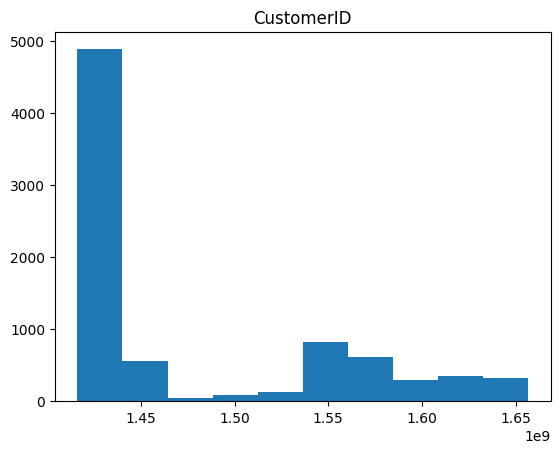

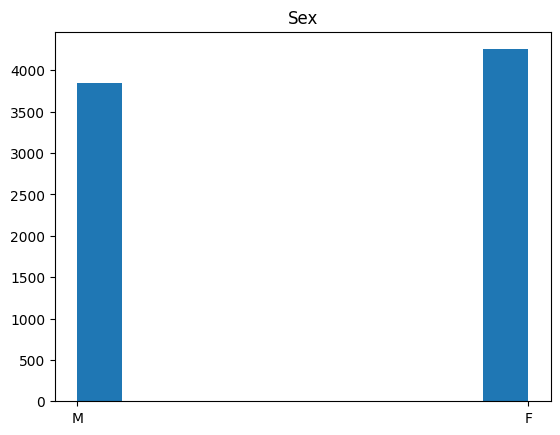

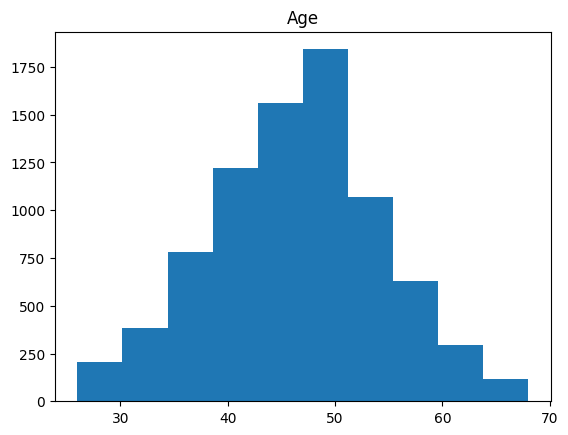

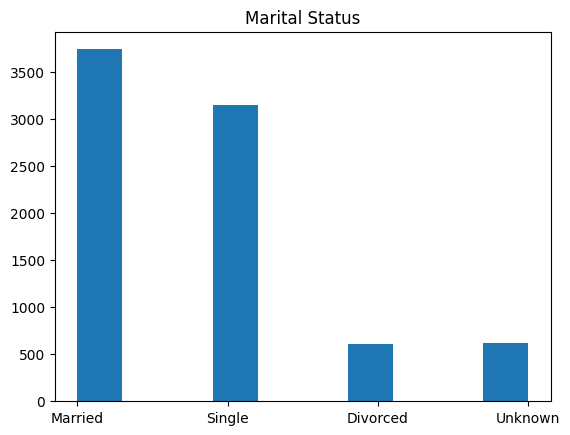

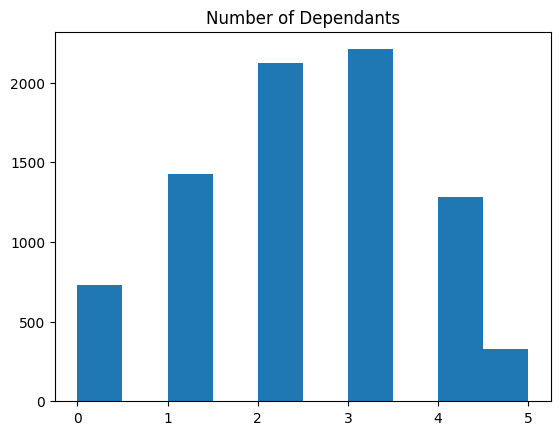

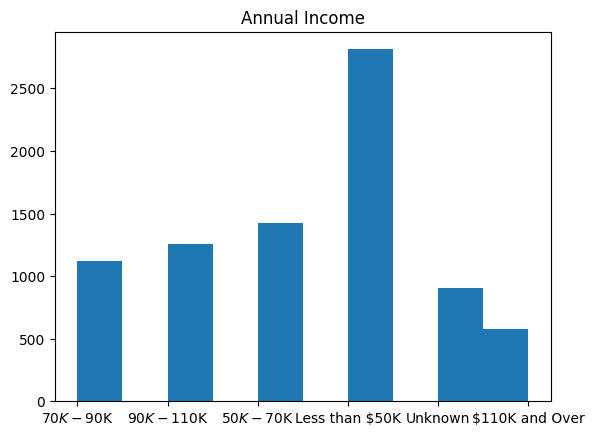

In [206]:
#create histograms
for i in records.iloc[:,:6]: 
    plt.hist(records[i])
    plt.title(i)
    plt.show()

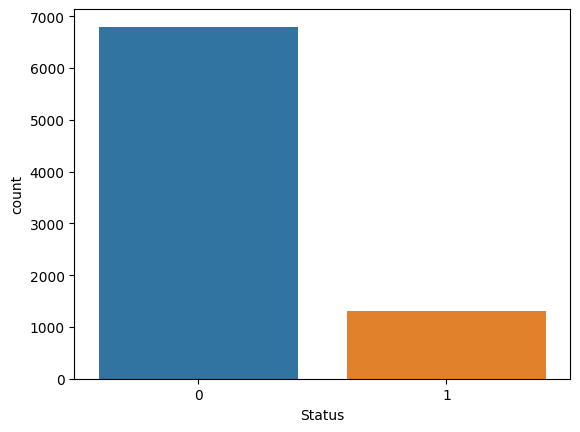

In [207]:
#create barchats
plot=sns.countplot(data=records, x='Status')
plt.show()

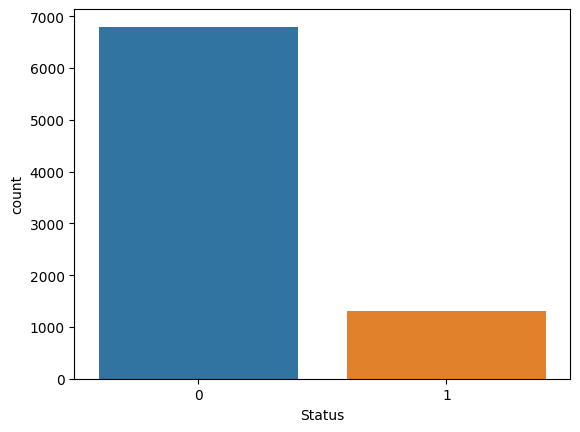

In [208]:
#create barchats
plot=sns.countplot(data=records, x='Status')


<ipython-input-209-e730cb82c0f4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=records.corr(), cmap="Blues", annot=True)


<Axes: >

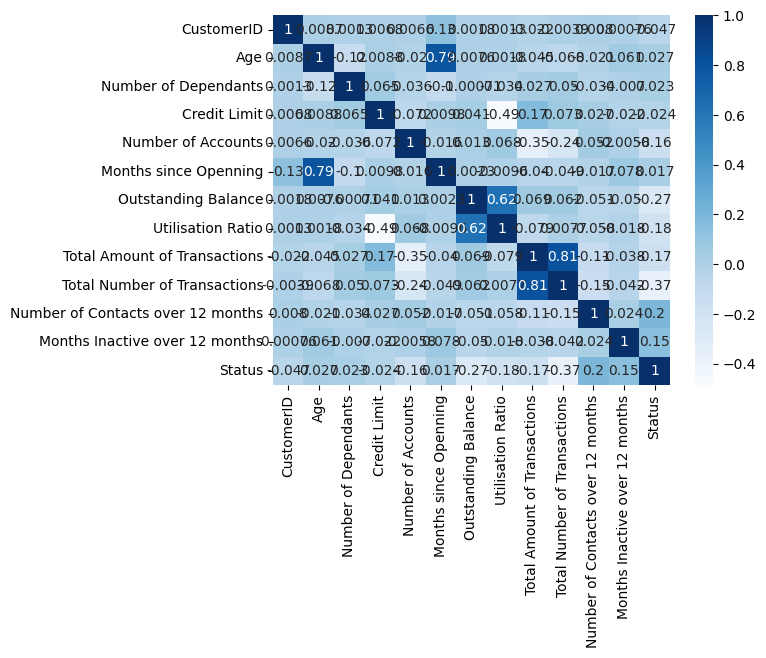

In [209]:
sns.heatmap(data=records.corr(), cmap="Blues", annot=True)

In [210]:
# Get the categorical columns
cat_columns = records.select_dtypes(include=['object']).columns
cat_columns

Index(['Sex', 'Marital Status', 'Annual Income', 'Account Type'], dtype='object')

In [211]:
cats=['Sex','Marital Status', 'Annual Income', 'Account Type']
for i in cats:
   print(i, ':\n')
   print(records[i].value_counts())
   print('\n')
   

Sex :

F    4253
M    3848
Name: Sex, dtype: int64


Marital Status :

Married     3736
Single      3146
Unknown      615
Divorced     604
Name: Marital Status, dtype: int64


Annual Income :

Less than $50K    2812
$50K - $70K       1423
$90K - $110K      1257
$70K - $90K       1123
Unknown            905
$110K and Over     581
Name: Annual Income, dtype: int64


Account Type :

Silver      7551
Gold         437
Diamond       94
Titanium      19
Name: Account Type, dtype: int64




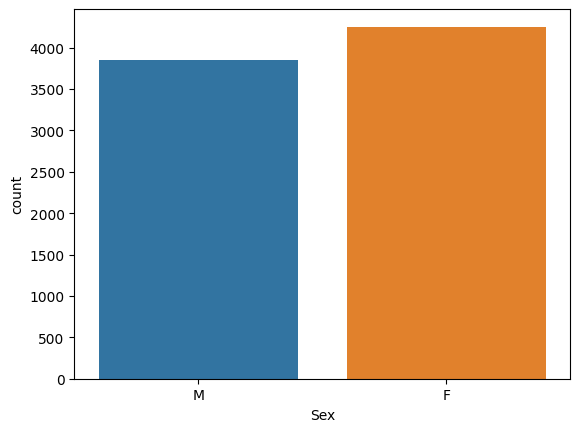

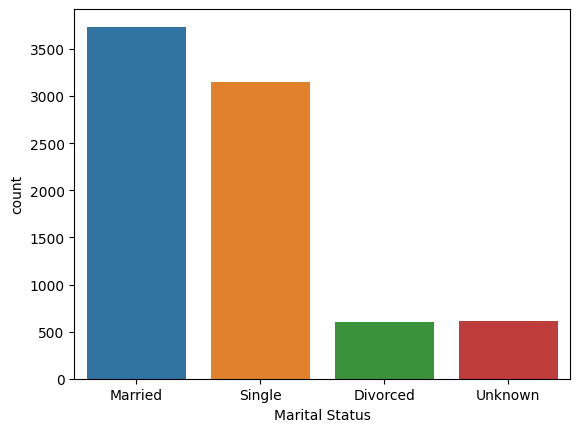

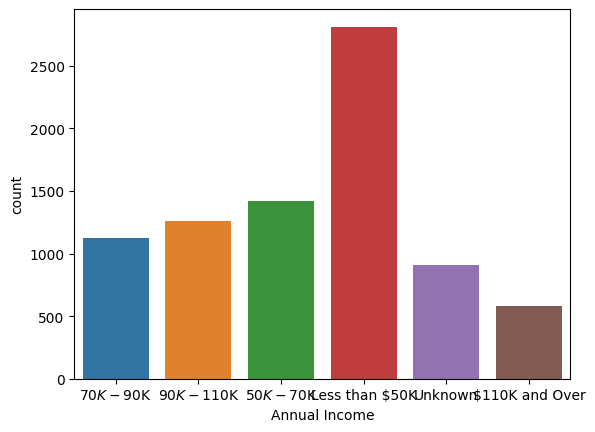

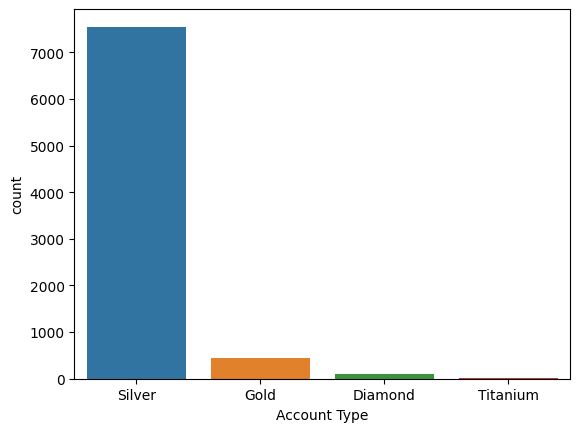

In [212]:
for i in cats:
   plt.figure()
   sns.countplot(x=records[i])

In [213]:
nums=['Age', 'Number of Dependants', 'Credit Limit','Number of Accounts','Months since Openning', 'Outstanding Balance', 'Utilisation Ratio','Total Amount of Transactions','Total Number of Transactions','Months Inactive over 12 months']
for i in nums:
   print(i, ':\n')
   print(records[i].describe())
   print('\n')


Age :

count    8101.000000
mean       46.273176
std         7.981850
min        26.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        68.000000
Name: Age, dtype: float64


Number of Dependants :

count    8101.000000
mean        2.355512
std         1.296535
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Number of Dependants, dtype: float64


Credit Limit :

count     8101.000000
mean      8686.277768
std       9095.531430
min       1438.300000
25%       2570.000000
50%       4592.000000
75%      11236.000000
max      34516.000000
Name: Credit Limit, dtype: float64


Number of Accounts :

count    8101.000000
mean        3.818417
std         1.561729
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Number of Accounts, dtype: float64


Months since Openning :

count    8101.000000
mean       35.874830
std         7.968666
min       

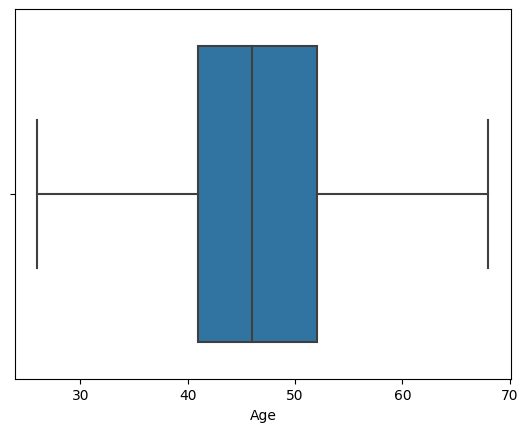

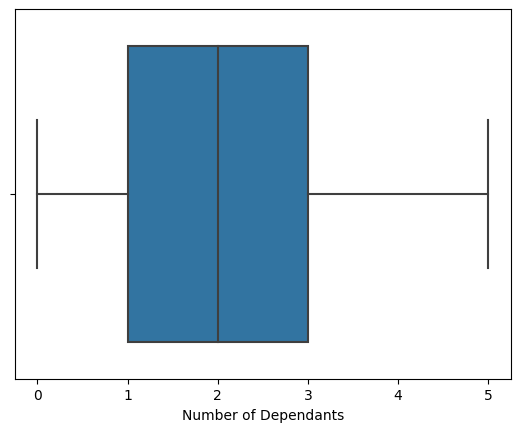

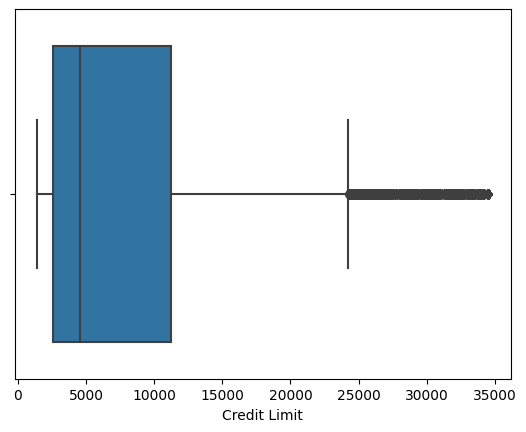

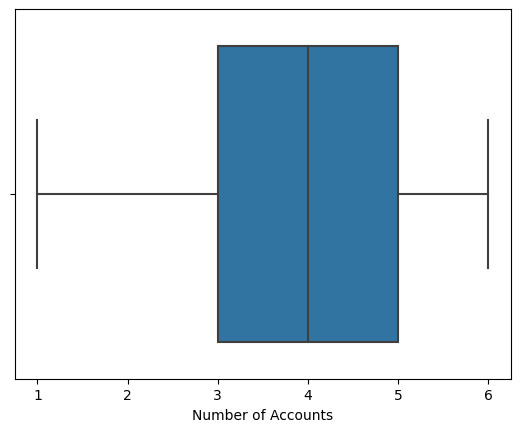

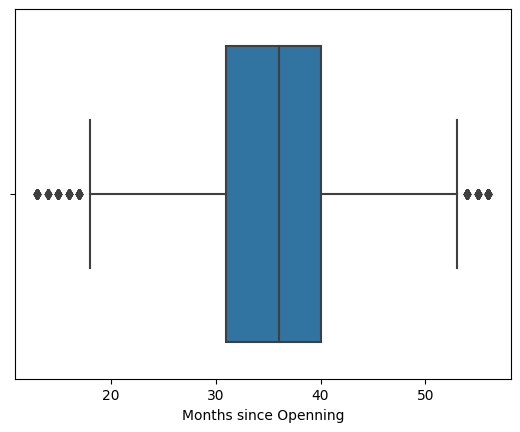

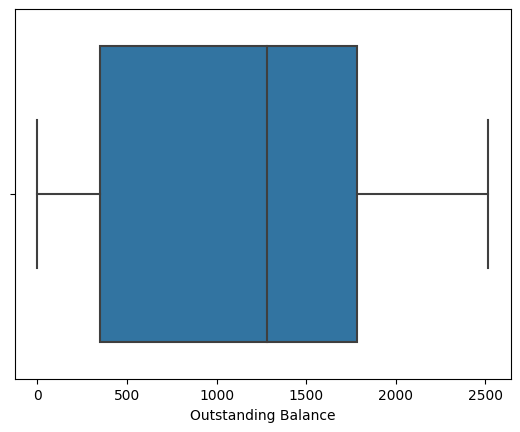

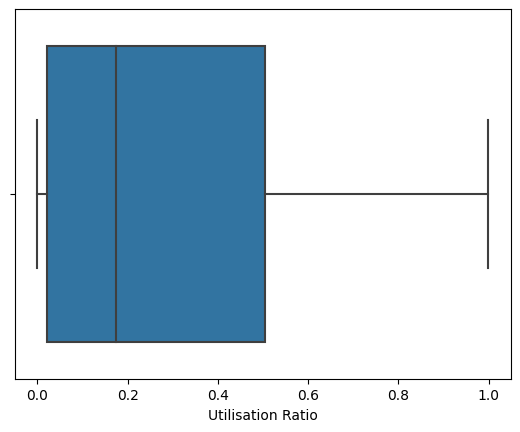

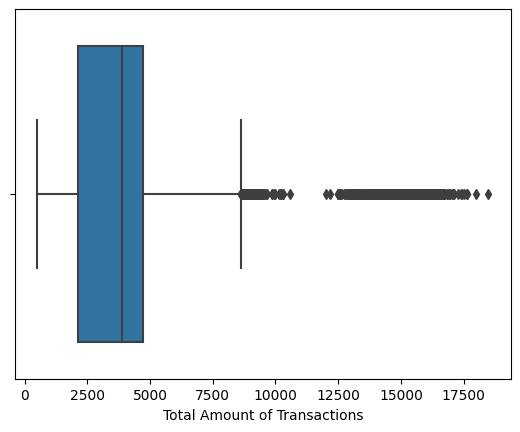

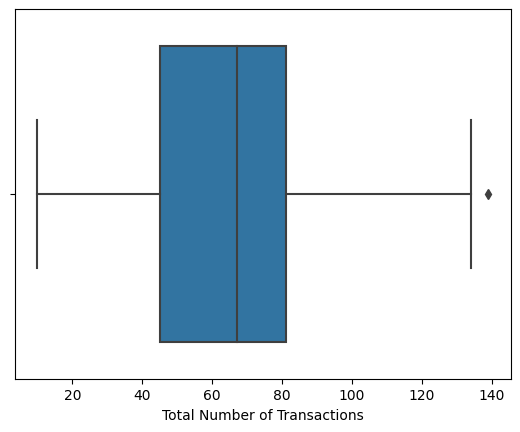

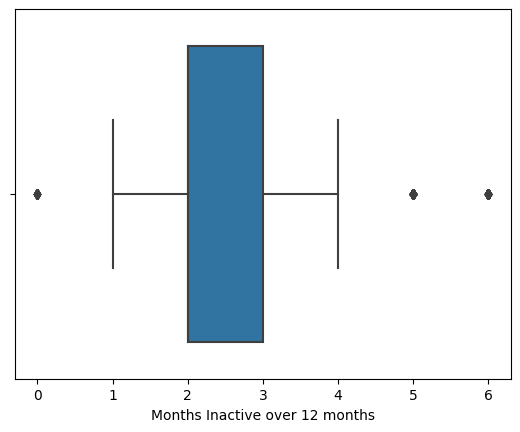

In [214]:
for i in nums:
  plt.figure()
  sns.boxplot(x=records[i])

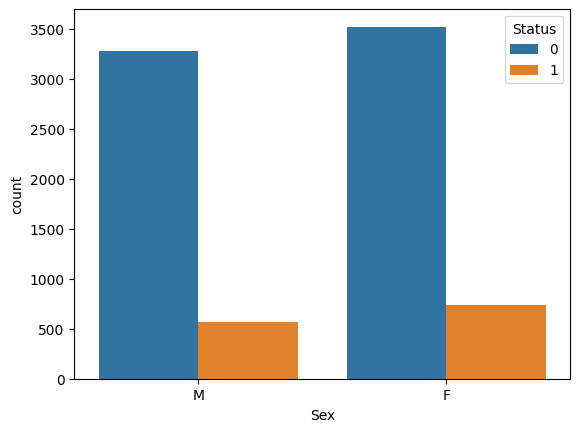

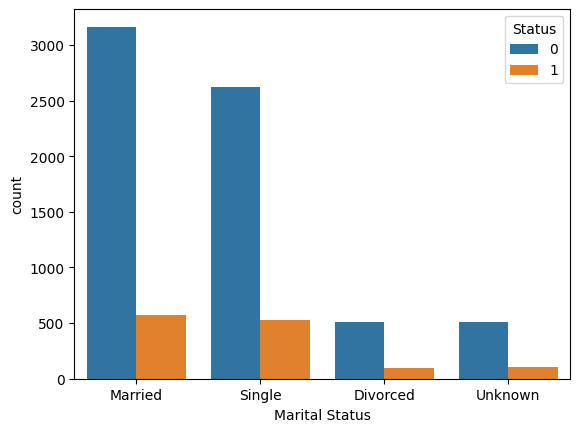

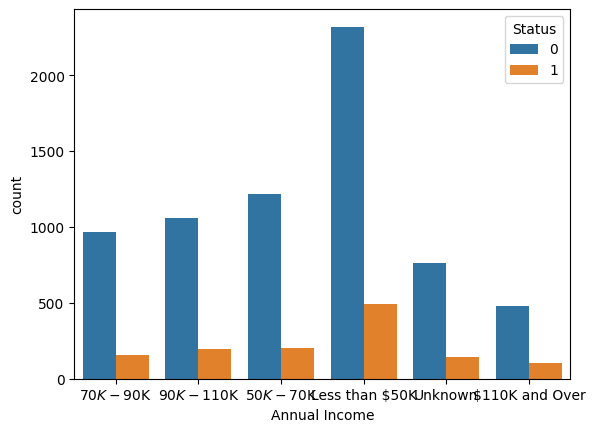

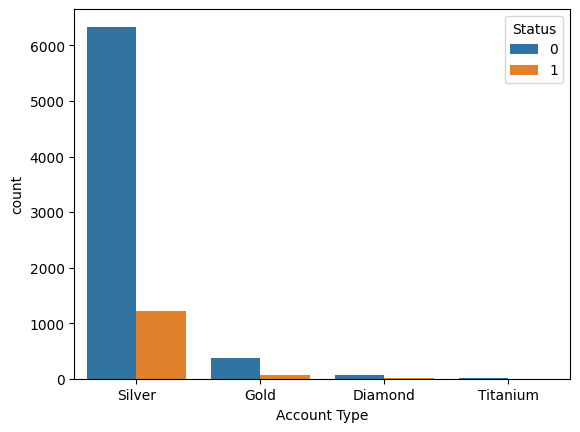

In [215]:
for i in cats:
   plt.figure()
   sns.countplot(x=records[i], hue=records['Status'])

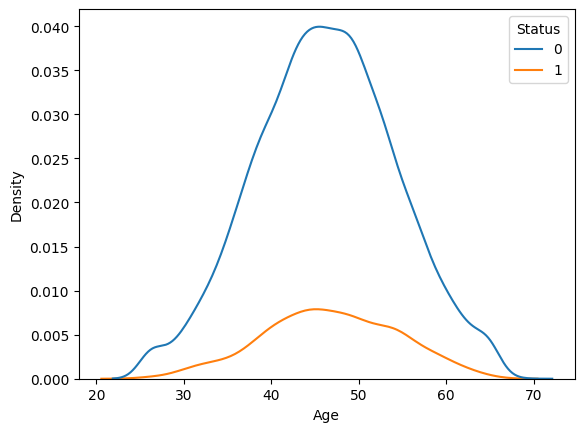

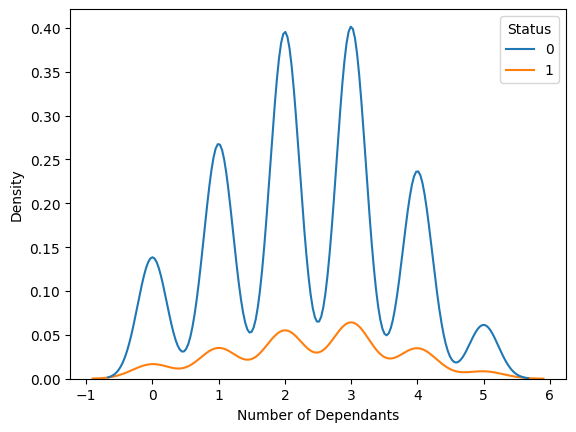

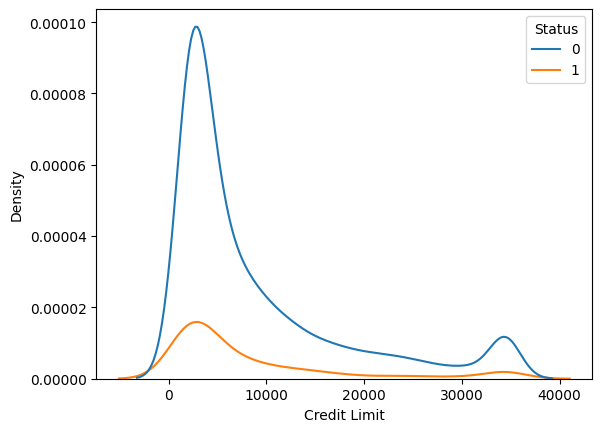

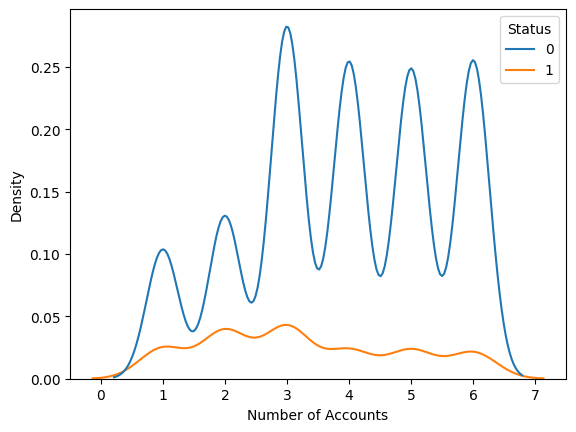

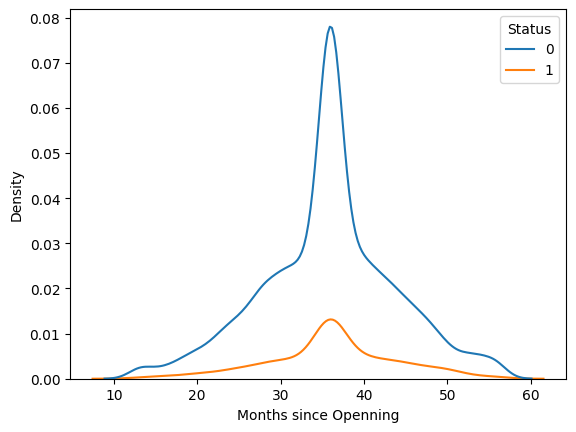

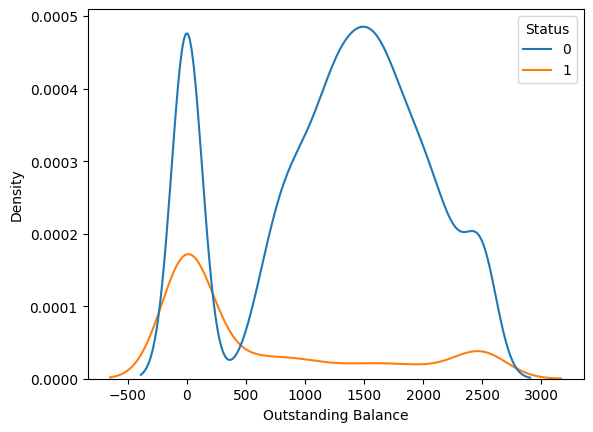

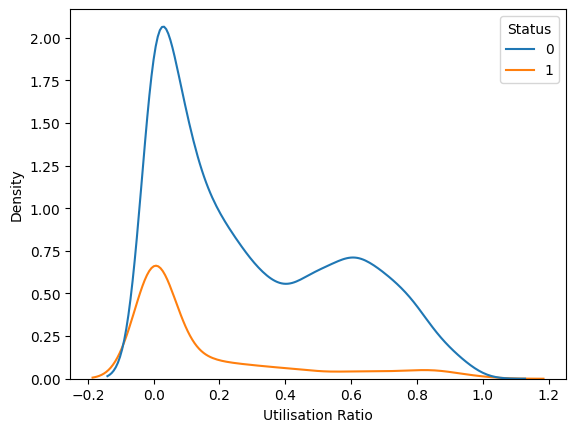

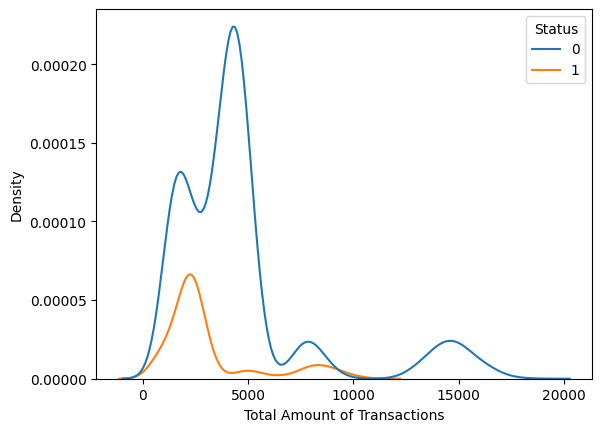

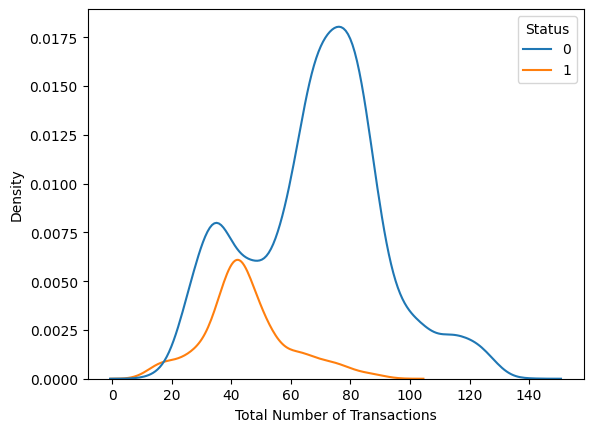

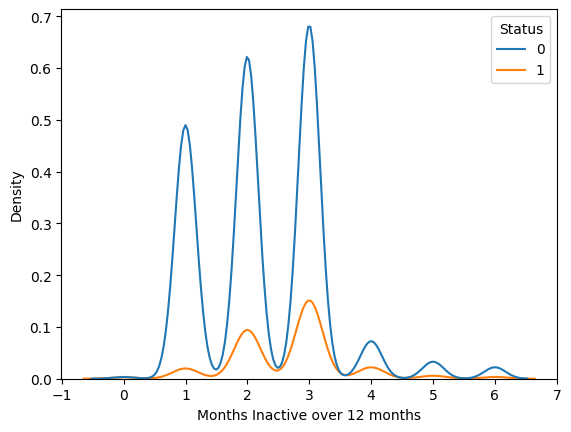

In [216]:
for i in nums:
  plt.figure()    
  sns.kdeplot(data=records, x=i, hue='Status')

<ipython-input-217-728c3b7c2aac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=records.corr(), annot=True, cmap='crest')


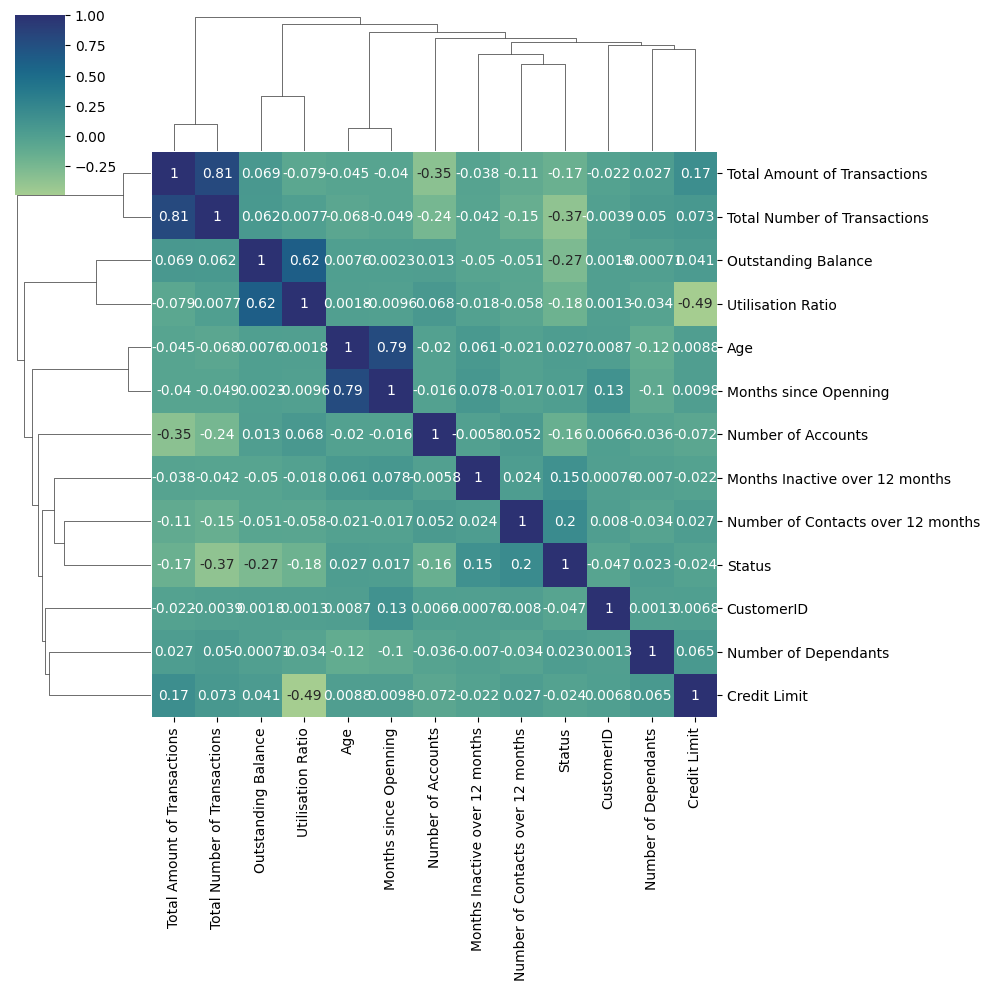

In [217]:
sns.clustermap(data=records.corr(), annot=True, cmap='crest')

In [218]:
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=cat_columns, drop_first=True)

print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         8101 non-null   int64  
 1   Age                                8101 non-null   int64  
 2   Number of Dependants               8101 non-null   int64  
 3   Credit Limit                       8101 non-null   float64
 4   Number of Accounts                 8101 non-null   int64  
 5   Months since Openning              8101 non-null   int64  
 6   Outstanding Balance                8101 non-null   int64  
 7   Utilisation Ratio                  8101 non-null   float64
 8   Total Amount of Transactions       8101 non-null   int64  
 9   Total Number of Transactions       8101 non-null   int64  
 10  Number of Contacts over 12 months  8101 non-null   int64  
 11  Months Inactive over 12 months     8101 non-null   int64

## **Selection Features and Label**

 Machine learning model development

In [219]:
#Define the predictors 
features=['Age','Number of Dependants',	'Credit Limit',	'Number of Accounts',	'Months since Openning','Outstanding Balance','Utilisation Ratio','Total Amount of Transactions',	'Total Number of Transactions',	'Marital Status_Single','Marital Status_Unknown','Annual Income_$50K - $70K',	'Annual Income_$70K - $90K','Annual Income_$90K - $110K',	'Annual Income_Less than $50K','Annual Income_Unknown','Account Type_Gold',	'Account Type_Silver','Account Type_Titanium']
X=records.drop('Status', axis=1)
#Define the label
y=records['Status']
print(X.head())
print(y.head())

   CustomerID  Age  Number of Dependants  Credit Limit  Number of Accounts  \
0  1621953962   51                     2        4123.0                   5   
1  1599451862   46                     3       19458.0                   4   
2  1429196012   49                     1        1438.3                   4   
3  1417901012   54                     3       34516.0                   2   
4  1427399912   47                     2       34516.0                   3   

   Months since Openning  Outstanding Balance  Utilisation Ratio  \
0                     46                 1760              0.427   
1                     40                 1435              0.074   
2                     41                  522              0.363   
3                     36                  761              0.022   
4                     36                 1264              0.037   

   Total Amount of Transactions  Total Number of Transactions  ...  \
0                          2447                     

In [220]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Status, dtype: int64

In [221]:
X.head()

,CustomerID,Age,Number of Dependants,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,...,Marital Status_Single,Marital Status_Unknown,Annual Income_$50K - $70K,Annual Income_$70K - $90K,Annual Income_$90K - $110K,Annual Income_Less than $50K,Annual Income_Unknown,Account Type_Gold,Account Type_Silver,Account Type_Titanium
0,1621953962,51,2,4123.0,5,46,1760,0.427,2447,40,...,0,0,0,1,0,0,0,0,1,0
1,1599451862,46,3,19458.0,4,40,1435,0.074,1217,27,...,0,0,0,0,1,0,0,0,1,0
2,1429196012,49,1,1438.3,4,41,522,0.363,2030,37,...,0,0,1,0,0,0,0,0,1,0
3,1417901012,54,3,34516.0,2,36,761,0.022,8444,68,...,0,0,0,0,1,0,0,1,0,0
4,1427399912,47,2,34516.0,3,36,1264,0.037,7827,77,...,1,0,0,0,1,0,0,0,1,0


## **Splitting the Dataset**



In [222]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)  # 80% training and 20% testing 

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape[0])
print('Test dataset size:',X_test.shape[0])


      CustomerID  Age  Number of Dependants  Credit Limit  Number of Accounts  \
3293  1425775112   50                     4       11882.0                   6   
5742  1420583612   43                     2        2086.0                   5   
165   1614791162   51                     4       34516.0                   2   
7853  1426942712   40                     2       19279.0                   6   
7353  1432990862   45                     4       15875.0                   4   

      Months since Openning  Outstanding Balance  Utilisation Ratio  \
3293                     31                 1472              0.124   
5742                     25                 2007              0.962   
165                      46                 1279              0.037   
7853                     28                 1427              0.074   
7353                     36                 1719              0.108   

      Total Amount of Transactions  Total Number of Transactions  ...  \
3293         

## **Training and Applying a Decision Tree Classifier**




In [223]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) #default criterion is gini, max_depth=25

# Train Decision Tree Classifer with the traning dataset 
clf = clf.fit(X_train, y_train)

#Make predictions for the test dataset
y_pred = clf.predict(X_test)


**Inspect Predictions**

In [224]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(10)

,CustomerID,Age,Number of Dependants,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,...,Annual Income_$50K - $70K,Annual Income_$70K - $90K,Annual Income_$90K - $110K,Annual Income_Less than $50K,Annual Income_Unknown,Account Type_Gold,Account Type_Silver,Account Type_Titanium,Actual,Predicted
8077,1427939612,62,0,2683.0,6,52,1707,0.636,1582,33,...,0,0,0,0,1,0,1,0,0,0
1950,1512054512,43,4,2422.0,5,36,1014,0.419,2437,44,...,0,0,0,1,0,0,1,0,1,0
5521,1416315512,53,2,14734.0,4,44,1634,0.111,1289,23,...,0,0,0,0,0,0,1,0,0,0
4022,1558602512,52,3,13109.0,3,34,1375,0.105,3563,73,...,0,0,0,1,0,1,0,0,0,0
6172,1580203562,40,3,6884.0,4,33,1001,0.145,975,11,...,1,0,0,0,0,0,1,0,0,0
322,1424563412,44,3,9114.0,2,36,0,0.000,2740,52,...,0,1,0,0,0,0,1,0,1,1
1235,1429122962,46,4,1681.0,4,36,0,0.000,1953,48,...,0,1,0,0,0,0,1,0,1,1
8011,1417952612,50,4,18142.0,5,34,0,0.000,15427,95,...,0,1,0,0,0,0,1,0,0,0
5883,1422403862,41,2,2317.0,3,30,1232,0.532,3057,71,...,0,1,0,0,0,0,1,0,0,0
1673,1432546412,45,2,8924.0,3,37,0,0.000,1720,42,...,0,0,0,1,0,0,1,0,1,1


## **Evaluating the model**



1.   Calculating Accuracy, Precision, Recall, F1







In [225]:
#Model Evaluation, calculate metrics: Accuracy, Precision, Recall, F1,
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test,y_pred))
print("Precision: ",'%.3f' % metrics.precision_score(y_test,y_pred))
print("Recall: ", '%.3f' % metrics.recall_score(y_test,y_pred))
print("F1: ", '%.3f' % metrics.f1_score(y_test,y_pred))


Accuracy:  0.913
Precision:  0.729
Recall:  0.732
F1:  0.730


In [226]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1289   71]
 [  70  191]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1360
           1       0.73      0.73      0.73       261

    accuracy                           0.91      1621
   macro avg       0.84      0.84      0.84      1621
weighted avg       0.91      0.91      0.91      1621



### **Plotting ROC (Receiver operating characteristic) curve and confusion matrix**



In [227]:
#get predicted probabilities for the main class
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]
y_pred_probs

array([0.00039793, 0.14123867, 0.03345725, ..., 0.03345725, 0.00039793,
       0.00039793])

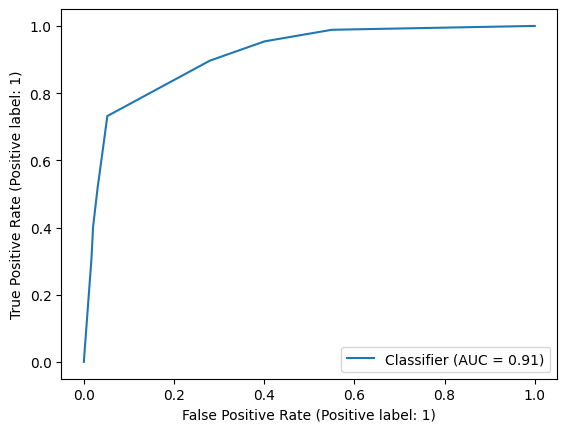

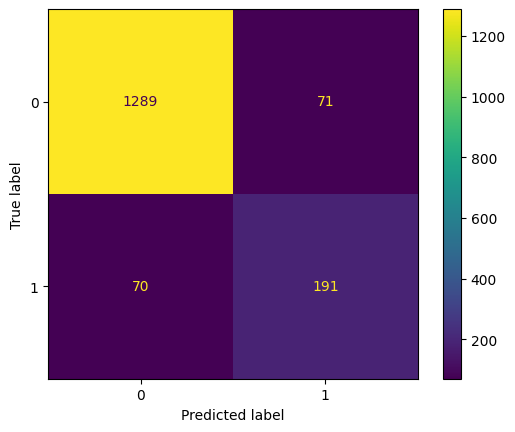

In [228]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [229]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [230]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [231]:
#Import plot_tree to  extract rules and visualise the decition tree model 
from sklearn.tree import plot_tree, export_text

In [232]:
# Create Logitic Regression classifer object

#Create an initial Logistic Regression model
logreg = LogisticRegression(max_iter=100)

# Complete the code to train Logistic Regression Classifer with the traning dataset 
logreg = logreg.fit(X_train, y_train)

#Complete the code to make predictions for the test dataset
y_pred = logreg.predict(X_test)


In [233]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1360    0]
 [ 261    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1360
           1       0.00      0.00      0.00       261

    accuracy                           0.84      1621
   macro avg       0.42      0.50      0.46      1621
weighted avg       0.70      0.84      0.77      1621



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ** Builing and evaluate Decision Trees**

### **Base DT**

In [234]:
# Create Decision Tree classifer object
base_clf = DecisionTreeClassifier(random_state=2023)

# Train Decision Tree Classifer
base_clf = base_clf.fit(X_train, y_train)

#We have the base tree, now predict the response for train dataset
y_pred_ontrain = base_clf.predict(X_train)

#Predict the response for test dataset
y_pred_ontest = base_clf.predict(X_test)


In [235]:
#import classes to display RocCurve and Confusion Matrix, read example from the website and try on your own
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [236]:
#print confusion matrix
print('Training performance: \n')
print(confusion_matrix(y_train, y_pred_ontrain))
print(classification_report(y_train, y_pred_ontrain))


Training performance: 

[[5439    0]
 [   0 1041]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5439
           1       1.00      1.00      1.00      1041

    accuracy                           1.00      6480
   macro avg       1.00      1.00      1.00      6480
weighted avg       1.00      1.00      1.00      6480



In [237]:
print('Test performance: \n')
print(confusion_matrix(y_test, y_pred_ontest))
print(classification_report(y_test, y_pred_ontest))

Test performance: 

[[1299   61]
 [  67  194]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1360
           1       0.76      0.74      0.75       261

    accuracy                           0.92      1621
   macro avg       0.86      0.85      0.85      1621
weighted avg       0.92      0.92      0.92      1621



In [238]:
# calculate performance metrics for the base DT
accuracy_no_pruning = accuracy_score(y_test, y_pred_ontest)
precision_no_pruning = precision_score(y_test, y_pred_ontest)
recall_no_pruning = recall_score(y_test, y_pred_ontest)
f1_no_pruning = f1_score(y_test, y_pred_ontest)

print('DT without prunning: ')
print('Accuracy: ','%.2f' % accuracy_no_pruning)
print('Precision: ', '%.2f' % precision_no_pruning)
print('Recall: ',  '%.2f' % recall_no_pruning)
print('F1 scopre :',  '%.2f' % f1_no_pruning)

DT without prunning: 
Accuracy:  0.92
Precision:  0.76
Recall:  0.74
F1 scopre : 0.75


In [239]:
#Import plot_tree to  extract rules and visualise the decition tree model 
from sklearn.tree import plot_tree, export_text

### **Pre Prune DT**

In [240]:
# Create Decision Tree classifer object
pre_pruned_clf = DecisionTreeClassifier(max_depth=6, criterion="entropy", max_leaf_nodes=10, random_state=2023)

# Train Decision Tree Classifer
pre_pruned_clf = pre_pruned_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_train_pruned = pre_pruned_clf.predict(X_train)

#Predict the response for test dataset
y_pred_pre_pruned = pre_pruned_clf.predict(X_test)

In [241]:
#print confusion matrix for the pre-pruned DT on the training data
print('Training performance of a pre_pruned decision tree: \n')
print(confusion_matrix(y_train, y_pred_train_pruned))
print(classification_report(y_train, y_pred_train_pruned))

Training performance of a pre_pruned decision tree: 

[[5308  131]
 [ 356  685]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5439
           1       0.84      0.66      0.74      1041

    accuracy                           0.92      6480
   macro avg       0.89      0.82      0.85      6480
weighted avg       0.92      0.92      0.92      6480



In [242]:
#print confusion matrix for a pre-pruned DT on the test data
print('Test performance of a pre_pruned decision tree: \n')
print(confusion_matrix(y_test, y_pred_pre_pruned))
print(classification_report(y_test, y_pred_pre_pruned))

Test performance of a pre_pruned decision tree: 

[[1319   41]
 [ 108  153]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1360
           1       0.79      0.59      0.67       261

    accuracy                           0.91      1621
   macro avg       0.86      0.78      0.81      1621
weighted avg       0.90      0.91      0.90      1621



In [243]:
from sklearn.model_selection import GridSearchCV

In [244]:
# Define parameter grid for grid search
param_grid = {'max_depth': range(1, 21),
              'max_leaf_nodes': range(5, 20)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=2023) , param_grid, cv=5) #scoring='f1_macro'
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2023),
             param_grid={'max_depth': range(1, 21),
                         'max_leaf_nodes': range(5, 20)})

In [245]:
# Select best decision tree classifier based on grid search results
pre_pruned_clf = grid_search.best_estimator_

# Make predictions on training data using the best decision tree classifier
y_pred_train_pre_pruned = pre_pruned_clf.predict(X_train)

# Make predictions on testing data using the best decision tree classifier
y_pred_pre_pruned = pre_pruned_clf.predict(X_test)

In [246]:
#print confusion matrix for the pre-pruned DT on the training data
print('Training performance of a pre_pruned decision tree: \n')
print(confusion_matrix(y_train, y_pred_train_pre_pruned))
print(classification_report(y_train, y_pred_train_pre_pruned))

Training performance of a pre_pruned decision tree: 

[[5277  162]
 [ 203  838]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5439
           1       0.84      0.80      0.82      1041

    accuracy                           0.94      6480
   macro avg       0.90      0.89      0.89      6480
weighted avg       0.94      0.94      0.94      6480



In [247]:
#print confusion matrix for a pre-pruned DT on the test data
print('Test performance of a pre_pruned decision tree: \n')
print(confusion_matrix(y_test, y_pred_pre_pruned))
print(classification_report(y_test, y_pred_pre_pruned))

Test performance of a pre_pruned decision tree: 

[[1321   39]
 [  62  199]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1360
           1       0.84      0.76      0.80       261

    accuracy                           0.94      1621
   macro avg       0.90      0.87      0.88      1621
weighted avg       0.94      0.94      0.94      1621



In [248]:
# calculate performance metrics for pre_pruned DT
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
precision_pre_pruned = precision_score(y_test, y_pred_pre_pruned)
recall_pre_pruned = recall_score(y_test, y_pred_pre_pruned)
f1_pre_pruned = f1_score(y_test, y_pred_pre_pruned)

print('DT pre pruned: ')
print('Accuracy: ','%.2f' % accuracy_pre_pruned)
print('Precision: ', '%.2f' % precision_pre_pruned)
print('Recall: ',  '%.2f' % recall_pre_pruned)
print('F1 scopre :',  '%.2f' % f1_pre_pruned)

DT pre pruned: 
Accuracy:  0.94
Precision:  0.84
Recall:  0.76
F1 scopre : 0.80


### **Post Prune DT**

In [249]:
# Post-prune the decision tree
path = base_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]  # Remove the maximum alpha as it is only the tree with one node
decision_trees = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(criterion="entropy", random_state=2023, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    decision_trees.append(dt)

# Find the decision tree with the highest accuracy on the validation data
accuracies = [accuracy_score(y_test, dt.predict(X_test)) for dt in decision_trees]
post_pruned_clf = decision_trees[accuracies.index(max(accuracies))]

# Make predictions on the training data using the best decision tree
y_pred_train_post_pruned = post_pruned_clf.predict(X_train)

# Make predictions on the testing data using the best decision tree
y_pred_post_pruned = post_pruned_clf.predict(X_test)


In [250]:
# Compute impurities for max_depth and min_samples_leaf
max_depth_path = base_clf.cost_complexity_pruning_path(X_train, y_train)
max_depth_impurity = max_depth_path['impurities']
min_samples_leaf_path = base_clf.cost_complexity_pruning_path(X_train, y_train)
min_samples_leaf_impurity = min_samples_leaf_path['impurities']

ccp_alpha = 0.0000, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, test accuracy = 0.9198
ccp_alpha = 0.0001, train accuracy = 1.0000, tes

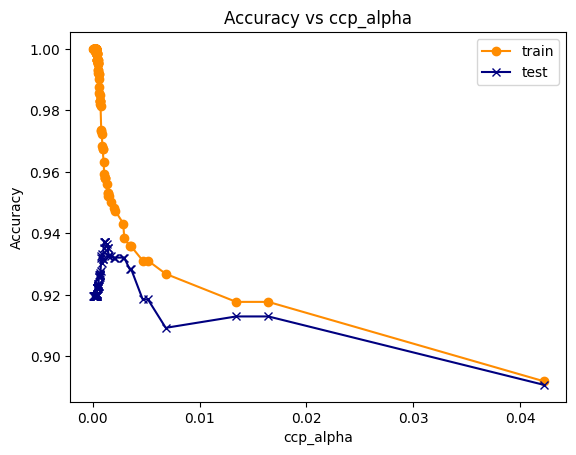

In [251]:
# Compute impurities for max_depth 
#max_depth_impurity = base_clf.cost_complexity_pruning_path(X_train, y_train)['impurities']

# Train decision tree classifiers using different ccp_alphas and impurities
#ccp_alphas = max_depth_impurity / max_depth_impurity[-1]  # normalize impurities
train_acc = []
test_acc = []
clfs=[]
for ccp_alpha in ccp_alphas:
    base_clf = DecisionTreeClassifier(random_state=2023, criterion="entropy", ccp_alpha=ccp_alpha)
    base_clf.fit(X_train, y_train)
    clfs.append(base_clf) 
    y_train_pred = base_clf.predict(X_train)
    y_test_pred = base_clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    print('ccp_alpha = {:.4f}, train accuracy = {:.4f}, test accuracy = {:.4f}'.format(ccp_alpha, train_accuracy, test_accuracy))

# Plot accuracy of training and testing trees with different ccp_alphas
plt.plot(ccp_alphas, train_acc, marker='o', color='darkorange', label='train')
plt.plot(ccp_alphas, test_acc, marker='x', color='navy', label='test')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha')
plt.legend()
plt.show()

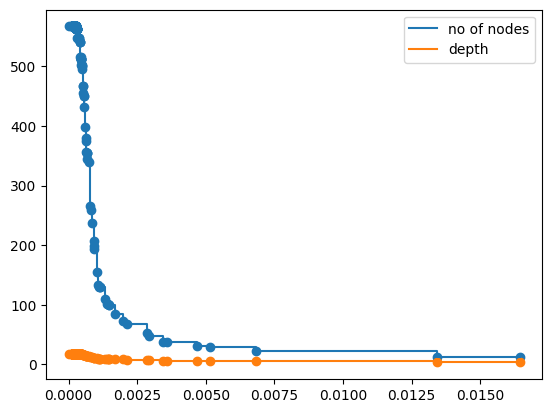

In [252]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

In [253]:
ccp_alpha = 0.0207
post_pruned_clf = DecisionTreeClassifier(random_state=2023, ccp_alpha=ccp_alpha)
post_pruned_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0207, random_state=2023)

In [254]:
# Get depth of decision tree
depth = post_pruned_clf.tree_.max_depth
print('Depth of decision tree:', depth)

# Get number of leaf nodes of decision tree
n_leaf_nodes = post_pruned_clf.tree_.n_leaves
print('Number of leaf nodes of decision tree:', n_leaf_nodes)

Depth of decision tree: 2
Number of leaf nodes of decision tree: 3


In [255]:
# Make predictions on the training data using the best decision tree
y_pred_train_post_pruned = post_pruned_clf.predict(X_train)

# Make predictions on the testing data using the best decision tree
y_pred_post_pruned = post_pruned_clf.predict(X_test)

In [256]:
#print confusion matrix for the post-pruned DT on the training data
print('Training performance of the best post_pruned decision tree: \n')
print(confusion_matrix(y_train, y_pred_train_post_pruned))
print(classification_report(y_train, y_pred_train_post_pruned))

Training performance of the best post_pruned decision tree: 

[[5249  190]
 [ 510  531]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5439
           1       0.74      0.51      0.60      1041

    accuracy                           0.89      6480
   macro avg       0.82      0.74      0.77      6480
weighted avg       0.88      0.89      0.88      6480



In [257]:
#print confusion matrix for the post-pruned DT on the test data
print('Test performance of the best post_pruned decision tree: \n')
print(confusion_matrix(y_test, y_pred_post_pruned))
print(classification_report(y_test, y_pred_post_pruned))

Test performance of the best post_pruned decision tree: 

[[1307   53]
 [ 124  137]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1360
           1       0.72      0.52      0.61       261

    accuracy                           0.89      1621
   macro avg       0.82      0.74      0.77      1621
weighted avg       0.88      0.89      0.88      1621



In [258]:
# calculate performance metrics for post_pruned DT
accuracy_post_pruned = accuracy_score(y_test, y_pred_post_pruned)
precision_post_pruned = precision_score(y_test, y_pred_post_pruned)
recall_post_pruned = recall_score(y_test, y_pred_post_pruned)
f1_post_pruned = f1_score(y_test, y_pred_post_pruned)

print('DT post prunning: ')
print('Accuracy: ','%.2f' % accuracy_post_pruned)
print('Precision: ', '%.2f' % precision_post_pruned)
print('Recall: ',  '%.2f' % recall_post_pruned)
print('F1 scopre :',  '%.2f' % f1_post_pruned)

DT post prunning: 
Accuracy:  0.89
Precision:  0.72
Recall:  0.52
F1 scopre : 0.61


##  Model comparison

In [259]:
from sklearn.metrics import roc_curve, roc_auc_score

In [260]:
#Base DT get predicted probabilities for the main class
y_pred_probs_base = base_clf.predict_proba(X_test)
y_pred_probs_base = y_pred_probs_base[:, 1]

#Pre pruned DT get predicted probabilities for the main class
y_pred_probs_pre = pre_pruned_clf.predict_proba(X_test)
y_pred_probs_pre = y_pred_probs_pre[:, 1]

#Post pruned DT get predicted probabilities for the main class
y_pred_probs_post = post_pruned_clf.predict_proba(X_test)
y_pred_probs_post = y_pred_probs_post[:, 1]

In [261]:
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, y_pred_probs_base)
auc_base=metrics.auc(fpr_base, tpr_base)

fpr_pre_pruned, tpr_pre_pruned, thresholds_pre_pruned = roc_curve(y_test, y_pred_probs_pre)
auc_pre_pruned=metrics.auc(fpr_pre_pruned, tpr_pre_pruned)

fpr_post_pruned, tpr_post_pruned, thresholds_post_pruned = roc_curve(y_test, y_pred_probs_post)
auc_post_pruned=metrics.auc(fpr_post_pruned, tpr_post_pruned)

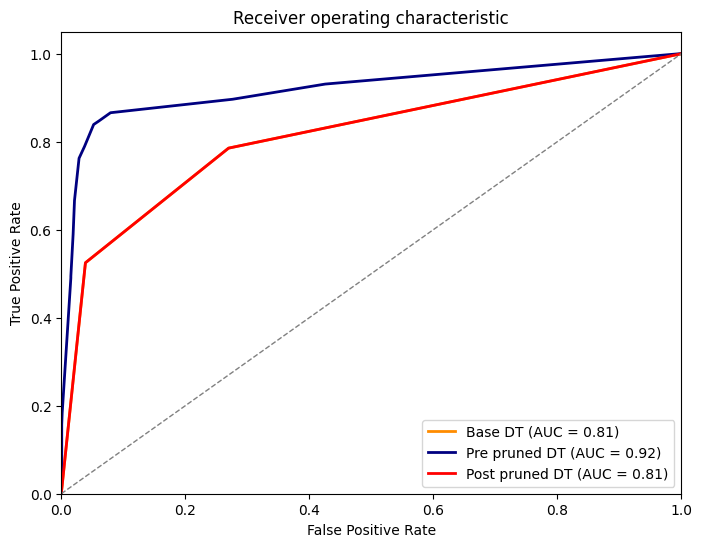

Base DT  AUC: 0.81
Pre pruned DT  AUC: 0.92
Post pruned DT  AUC: 0.81


In [262]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, color='darkorange', lw=2, label='Base DT (AUC = %0.2f)' % auc_base)
plt.plot(fpr_pre_pruned, tpr_pre_pruned, color='navy', lw=2, label='Pre pruned DT (AUC = %0.2f)' % auc_pre_pruned)
plt.plot(fpr_post_pruned, tpr_post_pruned, color='red', lw=2, label='Post pruned DT (AUC = %0.2f)' % auc_post_pruned)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute and print AUC
print('Base DT  AUC:','%.2f' %  auc_base)
print('Pre pruned DT  AUC:','%.2f' %  auc_pre_pruned)
print('Post pruned DT  AUC:','%.2f' %  auc_post_pruned)

In [263]:
#print confusion matrix for the base DT
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1360    0]
 [ 261    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1360
           1       0.00      0.00      0.00       261

    accuracy                           0.84      1621
   macro avg       0.42      0.50      0.46      1621
weighted avg       0.70      0.84      0.77      1621



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [264]:
#print confusion matrix for the pre-pruned DT
print(confusion_matrix(y_test, y_pred_pre_pruned))
print(classification_report(y_test, y_pred_pre_pruned))

[[1321   39]
 [  62  199]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1360
           1       0.84      0.76      0.80       261

    accuracy                           0.94      1621
   macro avg       0.90      0.87      0.88      1621
weighted avg       0.94      0.94      0.94      1621



In [265]:
#print confusion matrix for the post_pruned DT
print(confusion_matrix(y_test, y_pred_post_pruned))
print(classification_report(y_test, y_pred_post_pruned))

[[1307   53]
 [ 124  137]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1360
           1       0.72      0.52      0.61       261

    accuracy                           0.89      1621
   macro avg       0.82      0.74      0.77      1621
weighted avg       0.88      0.89      0.88      1621



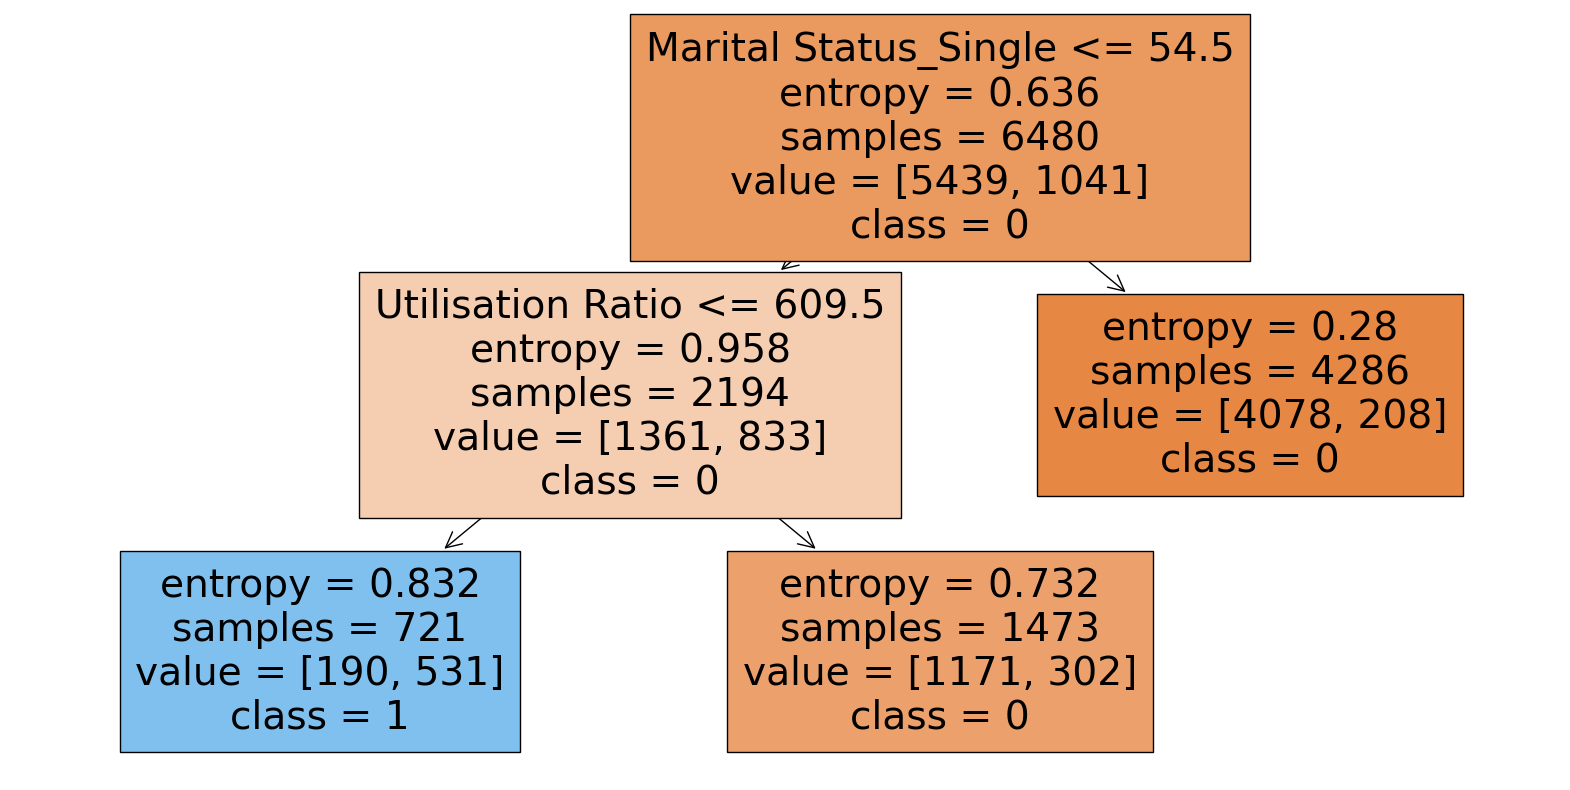

In [266]:
# visualize the base decision tree
plt.figure(figsize=(20,10))
plot_tree(base_clf, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

In [267]:
#Define predictors and label
X=records.drop('Status', axis=1)
y=records['Status']


##  KNN Classifier Model building

In [268]:
from sklearn.neighbors import KNeighborsClassifier #Import KNN classifier class
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [269]:
#import scaler
from sklearn.preprocessing import StandardScaler

In [270]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_norm=scaler.fit_transform(X)

In [271]:
# Split the data into X_train, X_test, y_train, y_test hint: use train_test_split(X_norm, y, test_size=0.35, stratify = y, random_state=2023 )
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.35, stratify = y, random_state=2023 )

## 2.4. Performance Evaluation
* Classification report
* Confusion matrix 
* ROC and AUC

In [272]:
# Train a KNN model
k = 15 # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k) #try it with p=1 and p=2

#fit the knn with X_train and y_train
knn.fit(X_train,y_train)
# Make predictions on the testing set
y_pred=knn.predict(X_test)


### **Classification report**

In [273]:
# Print the confusion_matrix and classification report using y_test and y_pred
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2355   25]
 [ 329  127]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2380
           1       0.84      0.28      0.42       456

    accuracy                           0.88      2836
   macro avg       0.86      0.63      0.67      2836
weighted avg       0.87      0.88      0.85      2836



In [274]:
#get predicted probabilities for the main class ( CONFIDENT INTERVAL )
y_pred_probs_norm = knn.predict_proba(X_test)
y_pred_probs_norm = y_pred_probs_norm[:, 1]
print(y_pred_probs_norm)

[0.06666667 0.2        0.06666667 ... 0.2        0.06666667 0.2       ]


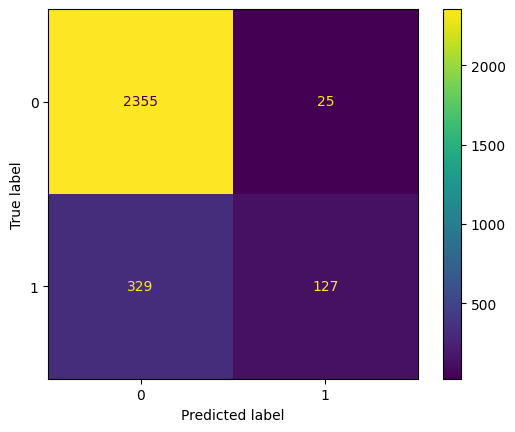

In [275]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

AUC: 0.886


<Axes: >

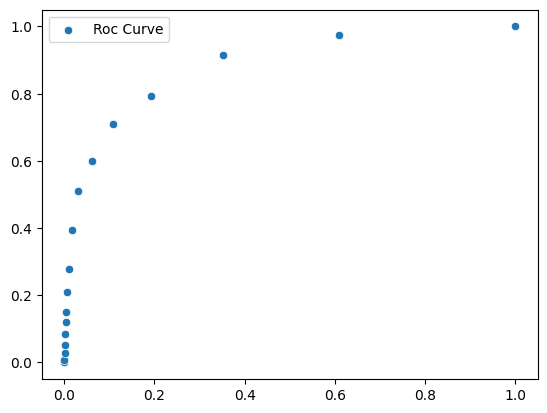

In [276]:
#get fpr and tpr and plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_norm)
print('AUC:', '%.3f' % metrics.auc(fpr, tpr))
sns.scatterplot(x=fpr, y=tpr, label='Roc Curve')

### **Finding the best threshold**



In [277]:
from sklearn.metrics import accuracy_score
# Finding the best threshold based on accuracy
accuracy = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_norm]
    accuracy.append(accuracy_score(y_test, y_pred_t))
best_threshold = thresholds[accuracy.index(max(accuracy))]

print(best_threshold)

0.4


In [278]:
from sklearn.metrics import f1_score
# Finding the best threshold based on F1 score
f1 = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_pred_probs_norm]
    f1.append(f1_score(y_test, y_pred_t))
best_threshold = thresholds[f1.index(max(f1))]

print(best_threshold)

0.26666666666666666


In [279]:
#get predicted probabilities for best threshold
y_pred_best = (y_pred_probs_norm >= best_threshold).astype(bool)

print(y_pred_best)
 
 

[False False False ... False False False]


In [280]:
#print confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

[[2124  256]
 [ 132  324]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2380
           1       0.56      0.71      0.63       456

    accuracy                           0.86      2836
   macro avg       0.75      0.80      0.77      2836
weighted avg       0.88      0.86      0.87      2836



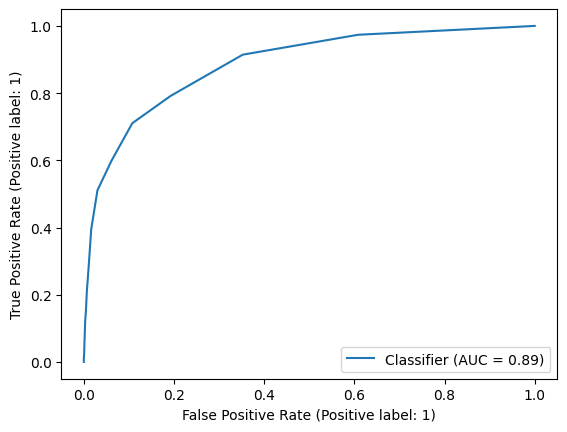

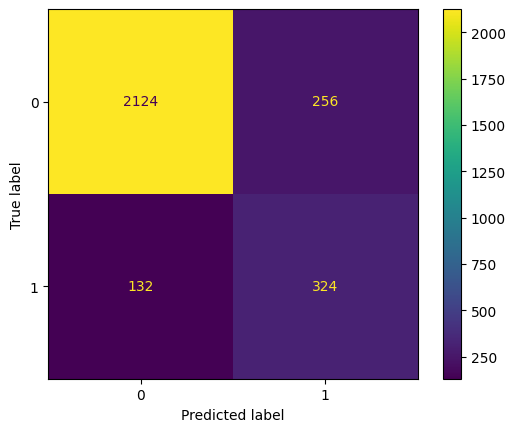

In [281]:
#what is displayed in the outcomes?
RocCurveDisplay.from_predictions(y_test, y_pred_probs_norm)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.show()


In [282]:
#Model evaluation with the original predictions 
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test,y_pred))
print("Precision: ", '%.3f' % metrics.precision_score(y_test,y_pred))
print("Recall: ", '%.3f' % metrics.recall_score(y_test,y_pred))
print("F1: ", '%.3f' % metrics.f1_score(y_test,y_pred))


Accuracy:  0.875
Precision:  0.836
Recall:  0.279
F1:  0.418


##  Optimising k
based on accuracy

Best k value: 9
Best accuracy: 0.885
F1 score for best accuracy: 0.513


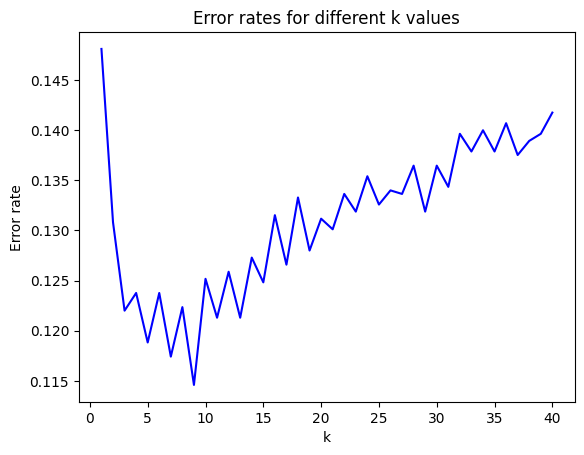

In [283]:
# Define a list of k values to test
k_values = list(range(1, 41))

# Train and evaluate KNN classifiers with different k values

best_k=0
best_accuracy=0
best_f1=0
accuracy_scores = []
accuracy = 0
error_rate=1-accuracy
error_rates=[]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k=knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)
    accuracy_scores.append(accuracy)
    error_rates.append(1-accuracy)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_f1 = metrics.f1_score(y_test, y_pred_k)

# Find the best k value with highest accuracy score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.3f}")
print(f"F1 score for best accuracy: {best_f1:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

**Optimise k based on f1_score**

Best k value: 3
Best F1 score: 0.546
Accuracy for Best F1 score: 0.878


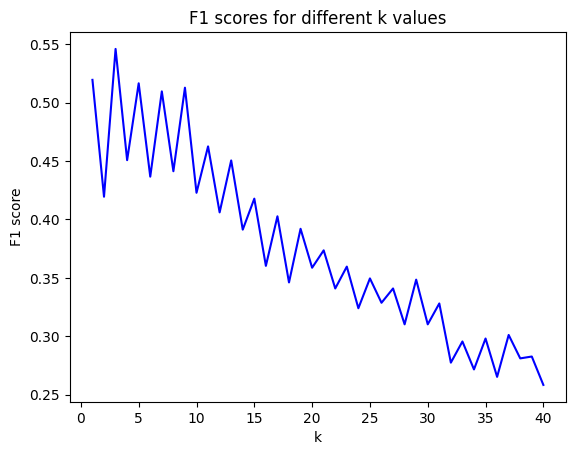

In [284]:
# Define a list of k values to test
k_values = list(range(1, 41))

# Train and evaluate KNN classifiers with different k values
best_k=0
best_f1=0
best_accuracy=0
f1_scores = []
f1 = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k=knn.predict(X_test)
    f1 = metrics.f1_score(y_test, y_pred_k)
    f1_scores.append(f1)
    accuracy_k=metrics.accuracy_score(y_test, y_pred_k)
    if ((f1 > best_f1) ):
        best_k = k
        best_f1 = f1
        best_accuracy = metrics.accuracy_score(y_test,y_pred_k)

# Find the best k value with highest f1 score
#best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k value: {best_k}")
print(f"Best F1 score: {best_f1:.3f}")
print(f"Accuracy for Best F1 score: {best_accuracy:.3f}")

# Plot k values against accuracy scores
#plt.plot(k_values, accuracy_scores, color='red')
plt.xlabel('k')
plt.ylabel('F1 score')
plt.title('F1 scores for different k values')
plt.plot(k_values, f1_scores, color='blue')
plt.show()

In [285]:
for K in range(25):
    K_value = K+1
    R = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    R.fit(X_train, y_train) 
    predict_y = R.predict(X_test)
    print ("Accuracy is ", accuracy_score(y_test,predict_y)*100,"% for K-Value:",K_value)

Accuracy is  85.1904090267983 % for K-Value: 1
Accuracy is  86.91819464033851 % for K-Value: 2
Accuracy is  87.7997179125529 % for K-Value: 3
Accuracy is  87.62341325811002 % for K-Value: 4
Accuracy is  88.11706629055007 % for K-Value: 5
Accuracy is  87.62341325811002 % for K-Value: 6
Accuracy is  88.25811001410437 % for K-Value: 7
Accuracy is  87.76445698166432 % for K-Value: 8
Accuracy is  88.54019746121298 % for K-Value: 9
Accuracy is  87.48236953455572 % for K-Value: 10
Accuracy is  87.87023977433005 % for K-Value: 11
Accuracy is  87.41184767277856 % for K-Value: 12
Accuracy is  87.87023977433005 % for K-Value: 13
Accuracy is  87.27080394922426 % for K-Value: 14
Accuracy is  87.51763046544428 % for K-Value: 15
Accuracy is  86.84767277856136 % for K-Value: 16
Accuracy is  87.34132581100141 % for K-Value: 17
Accuracy is  86.67136812411847 % for K-Value: 18
Accuracy is  87.2002820874471 % for K-Value: 19
Accuracy is  86.88293370944993 % for K-Value: 20
Accuracy is  86.98871650211566 %

In [286]:
inspection



,CustomerID,Age,Number of Dependants,Credit Limit,Number of Accounts,Months since Openning,Outstanding Balance,Utilisation Ratio,Total Amount of Transactions,Total Number of Transactions,...,Annual Income_$50K - $70K,Annual Income_$70K - $90K,Annual Income_$90K - $110K,Annual Income_Less than $50K,Annual Income_Unknown,Account Type_Gold,Account Type_Silver,Account Type_Titanium,Actual,Predicted
7988,1481572562,47,2,1789.0,4,40,1088,0.608,4191,90,...,0,0,0,1,0,0,1,0,0,0
2531,1615976312,57,2,6584.0,5,52,1817,0.276,1353,35,...,0,1,0,0,0,0,1,0,0,0
5915,1437327962,41,3,34516.0,1,28,1617,0.047,13083,93,...,0,0,1,0,0,0,1,0,0,0
2166,1418534462,47,4,1438.3,4,37,780,0.542,4422,59,...,0,0,0,1,0,0,1,0,0,0
5513,1574948612,49,2,20533.0,4,36,1321,0.064,3918,78,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,1432410662,52,3,2731.0,6,42,1692,0.620,1220,22,...,0,0,1,0,0,0,1,0,0,0
4976,1417241912,34,2,4369.0,6,13,2049,0.469,3259,80,...,0,0,0,0,0,0,1,0,0,0
6770,1612868912,40,2,2544.0,2,35,1713,0.673,8006,88,...,1,0,0,0,0,0,1,0,0,0
2207,1423198412,43,2,1452.0,5,34,0,0.000,4571,72,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
import pandas as pd

#Deploying Data

# Create a DataFrame from the predicted data
df = pd.DataFrame(inspection)

# Convert the DataFrame to a CSV file
df.to_csv('predicted_data.csv', index=False)
